<a href="https://colab.research.google.com/github/maurya-anuj/Eip4/blob/master/Assign3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


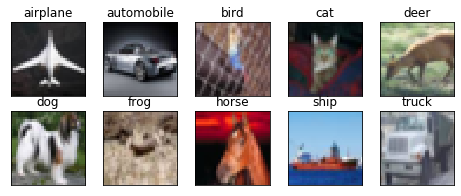

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
print([num_train, img_channels, img_rows, img_cols])
print([num_classes])

[50000, 32, 32, 3]
[10]


In [0]:
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [0]:
from keras.layers import SeparableConv2D, GlobalAveragePooling2D

# Define the model
model = Sequential()

model.add(SeparableConv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))  # 32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, (3, 3)))  # 30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(256, (3, 3)))  # 28
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))  # 14
model.add(Dropout(0.1))

model.add(SeparableConv2D(32, (3, 3), padding='same'))  # 14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, (3, 3)))  # 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(256, (3, 3)))  # 10
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(SeparableConv2D(512, (3, 3)))  # 6
# model.add(Activation('relu'))
# model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))  # 5
model.add(Dropout(0.1))

model.add(SeparableConv2D(32, (3, 3), padding='same'))  # 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, (3, 3), padding='same'))  # 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(256, (3, 3), padding='same'))  # 5
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.1))

model.add(GlobalAveragePooling2D())
# model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))



In [0]:
# from contextlib import redirect_stdout
# import os

# model_name = ""
# path = base_dir
# print("The current working directory is %s" % path)

# directory = os.path.join(path, model_name)
# Parameter_file = os.path.join(directory, model_name+'.txt')
# json_file = os.path.join(directory, model_name+'.json')

# # create directory if not exist
# if not os.path.exists(directory):
#     print("\n\n\n .... \n\n")
#     os.makedirs(directory)


# # Print Model to text file
# def myprint(s):
#     with open(Parameter_file, 'w') as f:
#         with redirect_stdout(f):
#             model.summary()

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_46 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
activation_52 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_47 (Separab (None, 30, 30, 64)        2400      
_________________________________________________________________
activation_53 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
separable_conv2d_48 (Separab (None, 28, 28, 256)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.03.
390/390 [==============================] - 32s 82ms/step - loss: 1.6402 - acc: 0.3954 - val_loss: 3.5257 - val_acc: 0.3383
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0227445034.
390/390 [==============================] - 27s 68ms/step - loss: 1.1925 - acc: 0.5737 - val_loss: 2.7062 - val_acc: 0.4426
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0183150183.
390/390 [==============================] - 27s 68ms/step - loss: 0.9382 - acc: 0.6687 - val_loss: 1.3028 - val_acc: 0.6189
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0153295861.
390/390 [==============================] - 27s 68ms/step - loss: 0.7890 - acc: 0.7203 - val_loss: 0.9566 - val_acc: 0.6852
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0131810193.
390/390 [==============================] - 27s 68ms/step - loss: 0.6957 - acc: 0.7562 

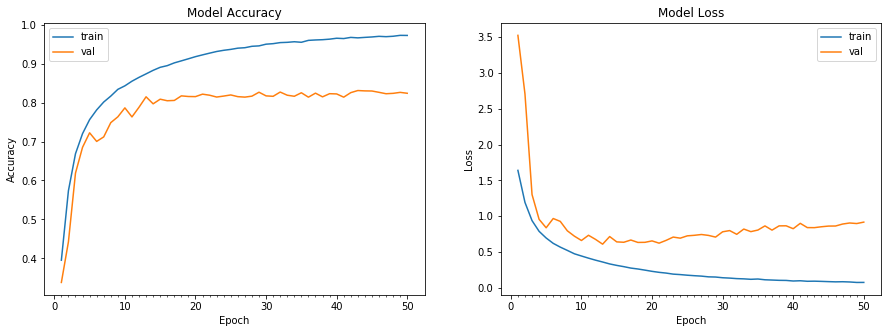

Accuracy on test data is: 82.39


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
    return round(0.03 * 1/(1 + 0.319 * epoch), 10)

# Compile the model
model.compile(optimizer=Adam(lr=0.03), loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))